In [1]:
import numpy as np
import pandas as pd
import math 
import sys
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline



In [3]:
X_train = np.genfromtxt('data/train.csv',  delimiter=',')
X_train = X_train[1:,:-1]

Y_train = np.genfromtxt('data/train_result.csv',  delimiter=',')
Y_train = Y_train[1:,-1]

X_test = np.genfromtxt('data/test.csv',  delimiter=',')
X_test = X_test[1:,:-1]

In [6]:
train_df = pd.read_csv('data/train.csv')

(50000, 1568)


In [ ]:
# train_df.head()


NameError: name 'X_train' is not defined

In [7]:
print(train_df.shape)
type(train_df)


(50000, 1569)


pandas.core.frame.DataFrame

-Each Image is 1568 feature-long. 
-Each image contains 2 digits.
    - Representing a 56x28 pixel image 

-Each digit is a total of 784 pixel (i.e. 1568/2)
    - Representing a 28x28 pixel image 

    

(1568,)


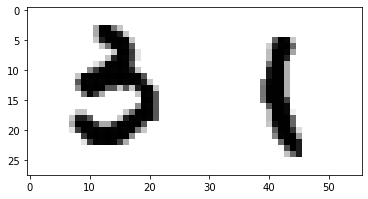

In [8]:
# Try displaying one image 
sampleImage = X_train[1,:]
print(sampleImage.shape)
fig = plt.figure
image = np.reshape(sampleImage, (28,56))
plt.imshow(image, cmap='gray_r')
plt.show()


Overview of label data. 
Labels go from 0 to 18 and we observe a bell-shaped (gaussian-like) distribution.

(50000,)
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18.]


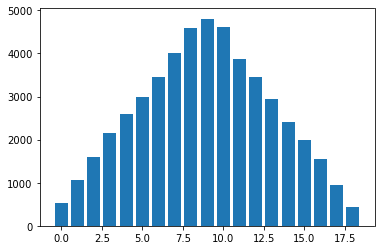

In [9]:
# Class labels summary

# sns.countplot(Y_train)
from collections import Counter
print(Y_train.shape)
print(np.unique(Y_train))
c = Counter(Y_train)
plt.bar(c.keys(), c.values())
plt.show()

In [10]:
from scipy.special import softmax
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False)

In [45]:

class LogisticRegression : 
    # def __init__(self):
    #     pass

    def load_train_data(self, train_inputs, train_labels):
        self.train_inputs=train_inputs
        self.train_labels=train_labels
        self.label_list = np.unique(train_labels)
        self.num_classes = np.unique(train_labels).size
        self.W = None # Weights for logistic regression

    # def softmax(inputs):
    #     """
    #     Calculate the softmax for the give inputs (array)
    #     :param inputs:
    #     :return:
    #     """
    #     return np.exp(inputs) / float(sum(np.exp(inputs)))

    # Stackoverflow suggested solution for one-hot encoding - Source : https://stackoverflow.com/questions/38592324/one-hot-encoding-using-numpy
    @staticmethod
    def get_one_hot(targets, nb_classes):
        res = np.eye(nb_classes)[np.array(targets).reshape(-1)]
        return res.reshape(list(targets.shape)+[nb_classes])

    @staticmethod
    def softmaxxxx(arrayData):
        """
        Returns an array with the calculated softmax of each of the labels
        """
        # arr = np.zeros(self.num_classes)
        # return np.exp(arrayData) / float(sum(np.exp(arrayData)))
        return (np.exp(arrayData).T / np.sum(np.exp(arrayData),axis=1)).T 
        
 

    def lossFunc(self, X,Y_onehot,W) : #v2 https://towardsdatascience.com/multiclass-logistic-regression-from-scratch-9cc0007da372
        Z = - X @ W
        n = X.shape[0]
        loss = (np.trace(X @ W @ Y_onehot.T) + np.sum(np.log(np.sum(np.exp(Z), axis=1)))) /n
        return loss
    
    def gradient(self, X, Y_onehot, W, mu): #v2
        Z = - X @ W

        # softMax = self.softmax(Z) #axis=1
        softMax = softmax(Z, axis=1) #axis=1
        

        n = X.shape[0]
        gd = (1/n)* (X.T @ (Y_onehot - softMax)) + 2 * mu * W
        return gd

    def gradient_descent_penalized(self, X, Y, max_iter=1000, eta=0.1, mu=0.01): #v2

        # Y_one_hot = self.get_one_hot(np.int_(Y) , self.num_classes)
        Y_one_hot = onehot_encoder.fit_transform(Y.reshape(-1,1))
        W = np.zeros((X.shape[1], Y_one_hot.shape[1]))
        step = 0
        # step_lst = [] 
        # loss_lst = []
        # W_lst = []
        
    
        while step < max_iter:
            #print (f'iteration # {step} of {max_iter} ; ({round(step/max_iter*100, 2)}%)') if step%50 ==0 else None 
            # print(f'step # {step}')

            step += 1
            W -= eta * self.gradient(X, Y_one_hot, W, mu)
            # step_lst.append(step)
            # W_lst.append(W)
            # loss_lst.append(self.lossFunc(X, Y_one_hot, W))


        # df = pd.DataFrame({
        #     'step': step_lst, 
        #     'loss': loss_lst
        # })
        # return df, W
        return W



    def train(self,max_iter, eta, mu) : 
        X=self.train_inputs
        Y=self.train_labels
        # Y_one_hot = self.get_one_hot(np.int_(Y) , self.num_classes)
        # self.loss_steps, self.W = self.gradient_descent_penalized(X, Y,  max_iter=20, eta=0.1, mu=0.01)
        self.W = self.gradient_descent_penalized(X, Y,  max_iter=max_iter, eta=eta, mu=mu)
        

    
    # def compute_predictions(self, X_test) :
    #     Z = X_test@self.W
    #     # softmaxArr = self.softmax(Z, axis=1)
    #     softmaxArr = self.softmax(Z) 

    #     return np.argmax(softmaxArr,axis=1)

    def compute_predictions(self, X_test):
        Z = - X_test @ self.W
        
        # P = self.softmax(Z) # axis = 1)
        P = softmax(Z, axis=1) 

        return np.argmax(P, axis=1)    


    # def compute_predictions(self, test_data):
    #     X=self.train_inputs
    #     Y=self.train_labels

    def split_dataset(train_inputs,train_labels):

        trainIndexes = [k for k in range(train_inputs.shape[0]) if k % 5 in (0,1,2,4) ]
        validationIndexes = [k for k in range(train_inputs.shape[0]) if k % 5 ==3 ]

        trainX = np.array([train_inputs[k] for k in trainIndexes])
        trainY = np.array([train_inputs[k] for k in trainIndexes])

        validX = np.array([train_inputs[k] for k in validationIndexes])
        validY = np.array([train_inputs[k] for k in validationIndexes])

        # trainX = np.array([banknote[k] for k in range(banknote.shape[0]) if k % 5 in (0,1,2) ])
        # trainSet = np.array([banknote[k] for k in range(banknote.shape[0]) if k % 5 in (0,1,2) ])
        # validationSet = np.array([banknote[k] for k in range(banknote.shape[0]) if k % 5 == 3 ])
        # testSet = np.array([banknote[k] for k in range(banknote.shape[0]) if k % 5 == 4 ])

        # return trainSet, validationSet, testSet
        return trainX, trainY, validX, validY


    @staticmethod
    def conf_matrix(testlabels, predlabels):
        n_classes = int(max(testlabels)) + 1 # +1 since first class is labeled 0
        matrix = np.zeros((n_classes,n_classes))

        for (test, pred) in zip(testlabels, predlabels):
            matrix[int(test),int(pred)]+=1
        return matrix    

    @staticmethod
    def errorRate (testlabels, predlabels) :
        # confmat = self.conf_matrix(self.train_labels, predlabels)
        confmat = LogisticRegression.conf_matrix(testlabels, predlabels)
        # print(confmat)

        # Test error
        sum_total_preds = np.sum(confmat)
        sum_correct_preds = np.sum(np.diag(confmat))
        errorRate = 1.0 - (float(sum_correct_preds) / float(sum_total_preds))
        return errorRate, confmat 





Test code 

With learnRate = 0.1, numIteratitions=5 :
    error rate is 0.89134
    took 5 sec

With learnRate = 0.1, numIteratitions=200 :
    error rate is 0.79278
    took 2min40

With learnRate = 0.01, numIteratitions=500 :
    error rate is 0.84582
    took 6min40

With learnRate = 0.1, numIteratitions=1000 :
    error rate is 0.756
    took 14min

With learnRate = 0.05, numIteratitions=2000 :
    error rate is 
    took min

######################################## NEW implementation stats ##############
With  max_iter=20, eta=0.1, mu=0.01 : 
    error rate is 0.85
    took a few seconds

With  max_iter=500, eta=0.1, mu=0.01 : 
    error rate is 0.7816
    took 5min25

With  max_iter=5000, eta=0.1, mu=0.01 : 
    error rate is 0.77364
    took 37min

With  max_iter=500, eta=0.1, mu=0.1 : 
    error rate is 0.85188
    took 3min

In [55]:
LogisticReg2= LogisticRegression()
LogisticReg2.load_train_data(X_train, Y_train)
LogisticReg2.train(max_iter= 100,eta = 0.5, mu = 0.1)

iteration # 0 of 100 ; (0.0%)
iteration # 50 of 100 ; (50.0%)


In [52]:
Y_pred_on_X_train = LogisticReg2.compute_predictions(X_train)
errorRate, confmat = LogisticReg2.errorRate(testlabels= Y_train, predlabels=Y_pred_on_X_train)
print(f'error rate is {errorRate}')


# with np.printoptions(precision=3, suppress=True):
#     print(confmat)

error rate is 0.86664


Testing the model with different mu

In [53]:

def get_test_error(mu):
  # ---> Write code here 
      LogisticReg2= LogisticRegression()
      LogisticReg2.load_train_data(X_train, Y_train)
      LogisticReg2.train(max_iter= 5,eta = 0.1, mu = mu)

      Y_pred_on_X_train = LogisticReg2.compute_predictions(X_train)
      errorRate, confmat = LogisticReg2.errorRate(testlabels= Y_train, predlabels=Y_pred_on_X_train)
      return errorRate

iteration # 0 of 5 ; (0.0%)
iteration # 0 of 5 ; (0.0%)
iteration # 0 of 5 ; (0.0%)
iteration # 0 of 5 ; (0.0%)
iteration # 0 of 5 ; (0.0%)
iteration # 0 of 5 ; (0.0%)
iteration # 0 of 5 ; (0.0%)
iteration # 0 of 5 ; (0.0%)
iteration # 0 of 5 ; (0.0%)
iteration # 0 of 5 ; (0.0%)
iteration # 0 of 5 ; (0.0%)
iteration # 0 of 5 ; (0.0%)
iteration # 0 of 5 ; (0.0%)
iteration # 0 of 5 ; (0.0%)


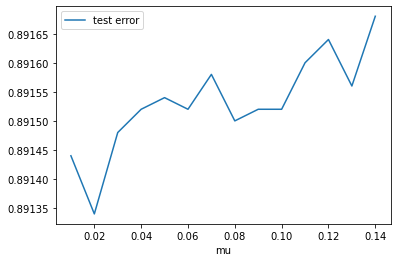

In [60]:
plt.plot(np.arange(1, 15)*0.01, [get_test_error(mu*0.01) for mu in range(1, 15)], label='test error')
plt.legend()
plt.xlabel('mu')
plt.show()

[ 7  8 11 ...  6  7  8]
(1568,)


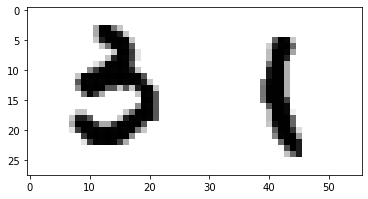

In [17]:
#manually verify some results 
print(Y_pred_on_X_train)
sampleImage = X_train[1,:]
print(sampleImage.shape)
fig = plt.figure
image = np.reshape(sampleImage, (28,56))
plt.imshow(image, cmap='gray_r')
plt.show()
